tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]])
tensor([[[[0.0941, 0.0941, 0.0902,  ..., 0.0824, 0.0863, 0.0941],
          [0.0902, 0.0941, 0.0863,  ..., 0.0863, 0.0902, 0.0980],
          [0.0863, 0.0902, 0.0863,  ..., 0.0941, 0.1059, 0.1098],
          ...,
          [0.0627, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
          [0.0627, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667],
          [0.0627, 0.0706, 0.0706,  ..., 0.0667, 0.0667, 0.0667]]]])
torch.Size([2, 3, 1024, 1024])


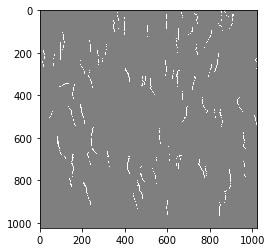

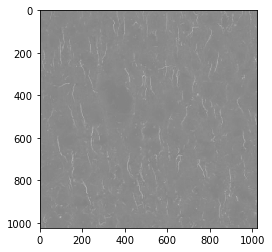

epoch:  0  loss:  0.0021452000364661217
epoch:  10  loss:  0.0011367698898538947
epoch:  20  loss:  0.0011227399809285998
epoch:  30  loss:  0.0011105412850156426
epoch:  40  loss:  0.00109905528370291
epoch:  50  loss:  0.001088220626115799
epoch:  60  loss:  0.0010779805015772581
epoch:  70  loss:  0.0010682930005714297
epoch:  80  loss:  0.001059122383594513
epoch:  90  loss:  0.0010504183592274785


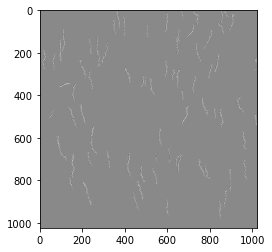

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F
# Defining input size, hidden layer size, output size and batch size respectively

data_path = './imgs/'
train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=10,
        num_workers=0,
        shuffle=True
    )
# get some random training images
dataiter = iter(train_loader)
images= dataiter.next()

#w, h, batch_size = 40, 40, 1
# Create dummy input and target tensors (data)
    
#x = torch.randn(batch_size,1,w,h).clamp(min=0,max=1)
#y = torch.randn(batch_size,1,w,h).clamp(min=0,max=1).int().float()
x = images[0][1].unsqueeze_(0)
y = images[0][0].unsqueeze_(0)
x = torch.max(x, dim=1,keepdim = True)[0]
y = torch.max(y, dim=1,keepdim = True)[0]
print(x)
print(y)
print(images[0].shape)

imshow(torchvision.utils.make_grid(x))
imshow(torchvision.utils.make_grid(y))

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3,padding =1)
        self.conv2 = nn.Conv2d(8, 1, 7,padding = 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
'''
model = nn.Sequential(
   nn.Conv2d(1, 8, 3,padding = 1),
   nn.ReLU(),
   nn.Conv2d(8, 1, 7,padding = 3),
   nn.ReLU())
'''
model = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)
x = x.to(device)
y = y.to(device)

#Construct the loss function
criterion = torch.nn.MSELoss()
#criterion = torch.nn.CrossEntropyLoss()
# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
# Gradient Descent
for epoch in range(100):
   # Forward pass: Compute predicted y by passing x to the model

   y_pred = model(x)

   # Compute and print loss
   loss = criterion(y_pred, y)
   if epoch % 10 ==0 :
      print('epoch: ', epoch,' loss: ', loss.item())

   # Zero gradients, perform a backward pass, and update the weights.
   optimizer.zero_grad()

   # perform a backward pass (backpropagation)
   loss.backward()

   # Update the parameters
   optimizer.step()
    
PATH = './binary_net.pth'
torch.save(model.state_dict(), PATH)    
y_pred = model(x)
y_pred = y_pred.detach()

imshow(torchvision.utils.make_grid(y_pred.cpu()))
torchvision.utils.save_image(y_pred,"./result1.jpg")

torch.Size([2, 3, 1024, 1024])


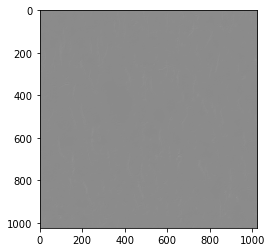

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
import torch 
import torchvision
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3,padding =1)
        self.conv2 = nn.Conv2d(8, 1, 7,padding = 3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        return x
net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net.to(device)
PATH = './binary_net.pth'
net.load_state_dict(torch.load(PATH))

data_path = './imgs/'
train_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.ToTensor()
    )
train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=10,
        num_workers=0,
        shuffle=True
    )
# get some random training images
dataiter = iter(train_loader)
images= dataiter.next()
print(images[0].shape)
x = images[0][1].unsqueeze_(0)
x = torch.max(x, dim=1,keepdim = True)[0].to(device)
predic = net(x).detach()
imshow(torchvision.utils.make_grid(predic.cpu()))
torchvision.utils.save_image(predic,"./result.jpg")


In [36]:
import torch
import torchvision
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


0it [00:00, ?it/s]

170500096it [3:46:59, 54850.86it/s]                                                                                    

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


170500096it [3:47:10, 54850.86it/s]

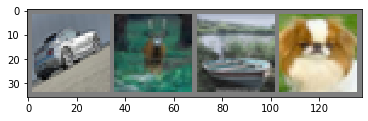

  car  deer  ship   dog


In [38]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [45]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [46]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        #inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.233
[1,  4000] loss: 1.896
[1,  6000] loss: 1.685
[1,  8000] loss: 1.568
[1, 10000] loss: 1.507
[1, 12000] loss: 1.452
[2,  2000] loss: 1.399
[2,  4000] loss: 1.368
[2,  6000] loss: 1.331
[2,  8000] loss: 1.316
[2, 10000] loss: 1.266
[2, 12000] loss: 1.251
Finished Training


In [42]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

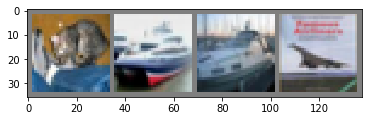

GroundTruth:    cat  ship  ship plane


In [43]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [47]:
net = Net()
net.load_state_dict(torch.load(PATH))
#Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)
#The outputs are energies for the 10 classes. The higher the energy for a class, the more the network thinks that the image is of the particular class. So, let’s get the index of the highest energy:

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))
print(images.shape)

Predicted:    cat   car  ship plane
torch.Size([4, 3, 32, 32])


188


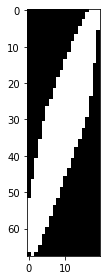

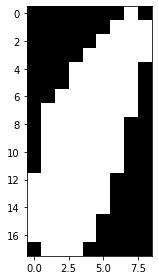

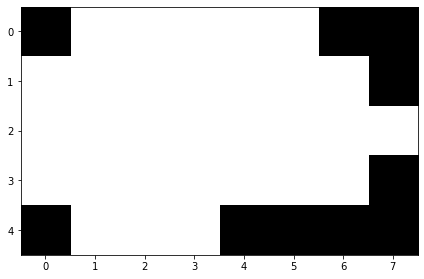

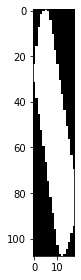

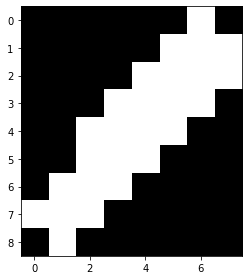

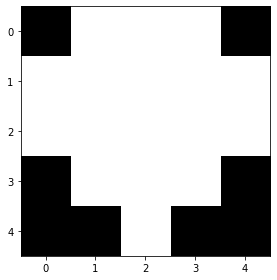

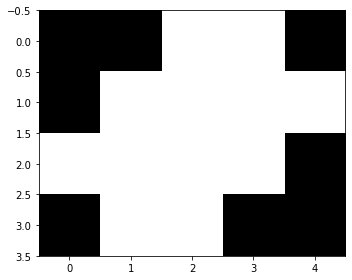

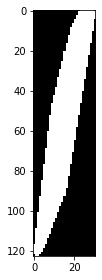

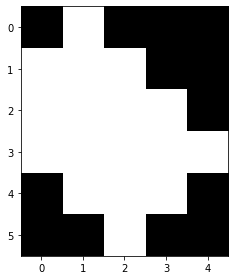

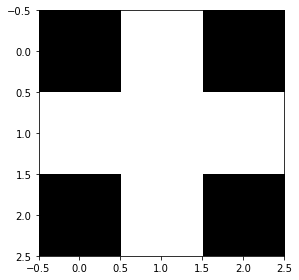

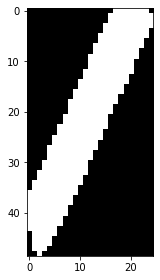

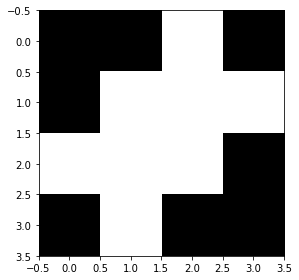

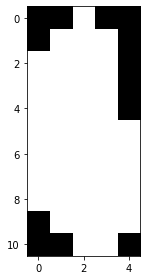

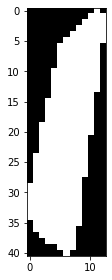

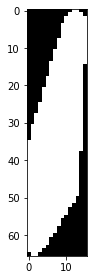

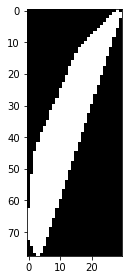

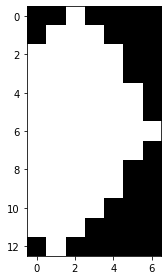

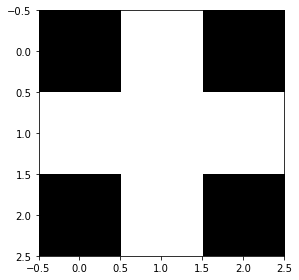

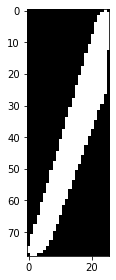

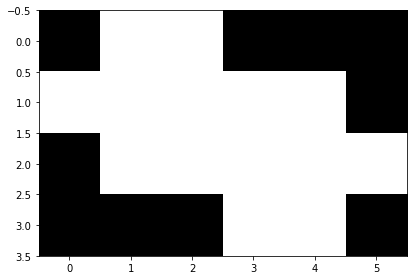

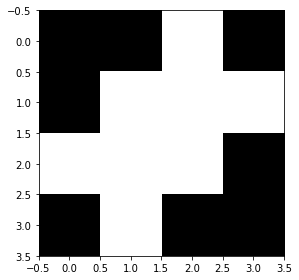

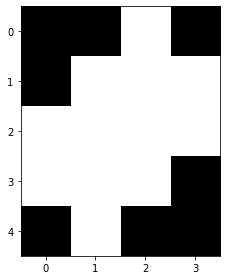

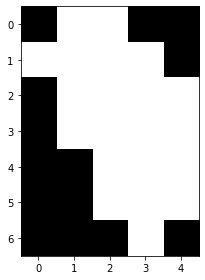

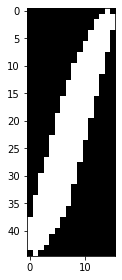

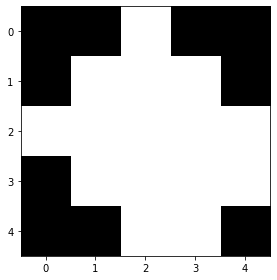

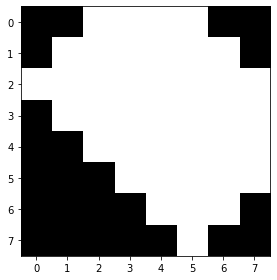

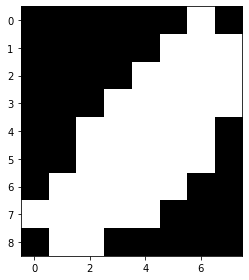

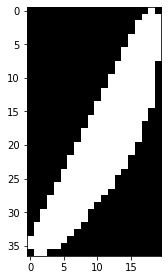

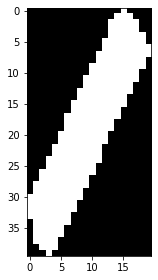

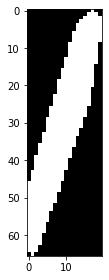

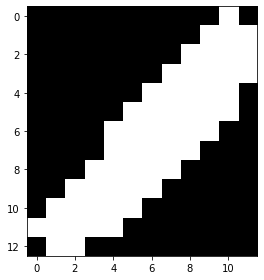

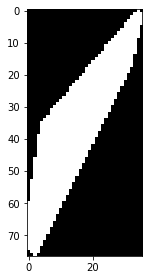

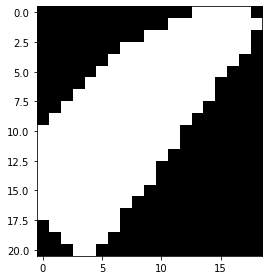

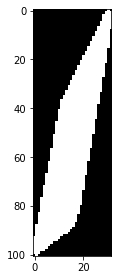

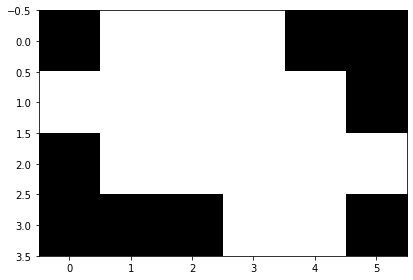

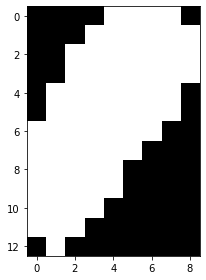

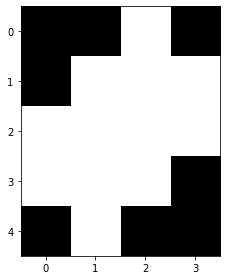

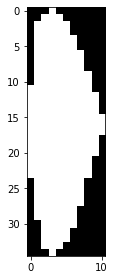

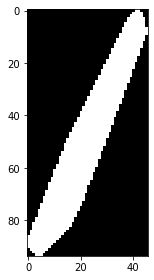

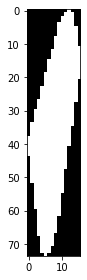

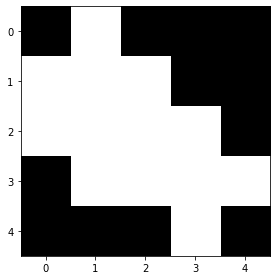

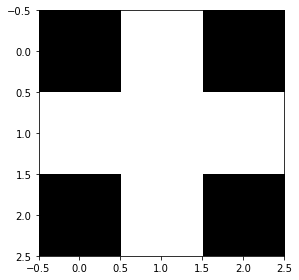

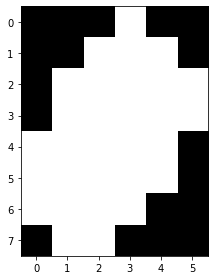

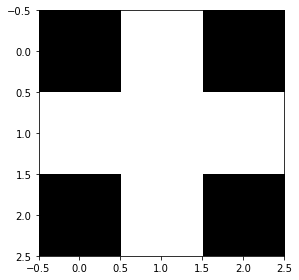

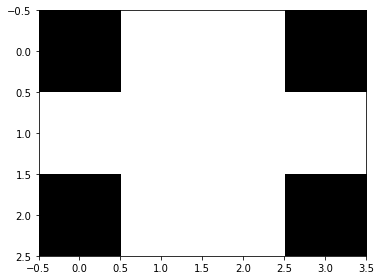

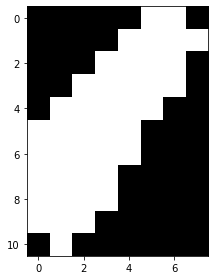

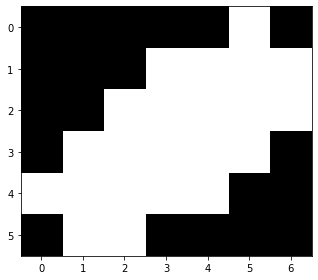

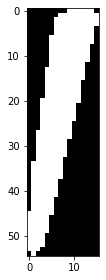

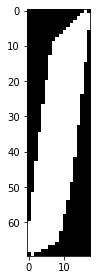

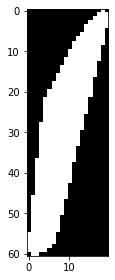

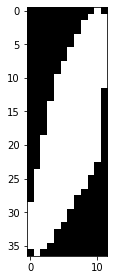

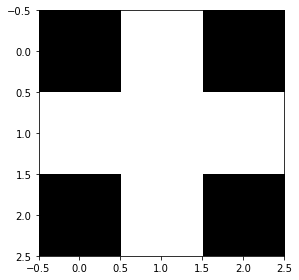

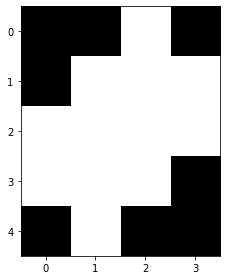

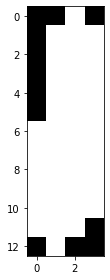

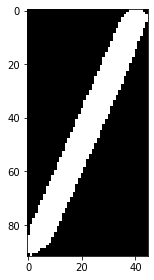

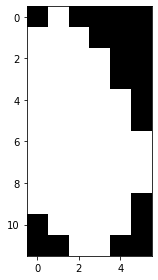

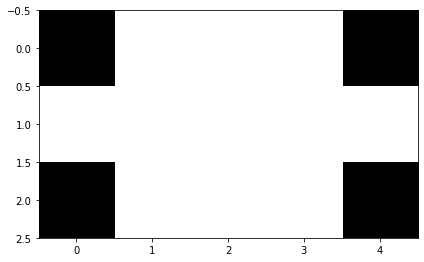

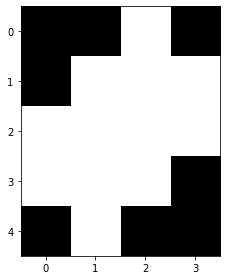

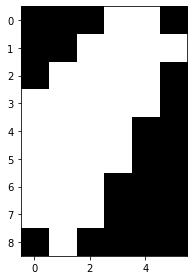

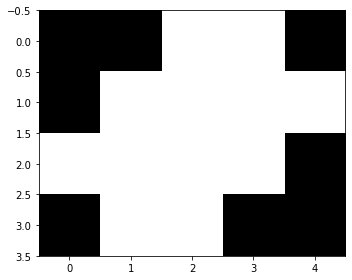

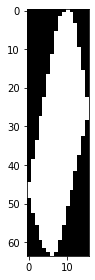

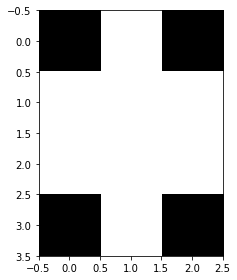

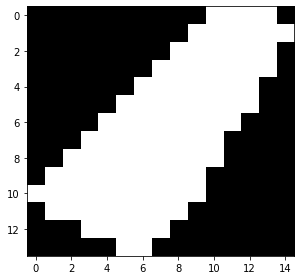

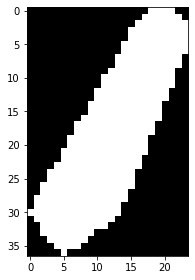

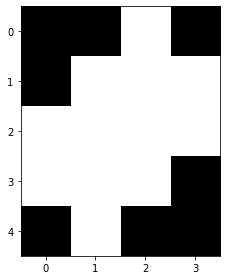

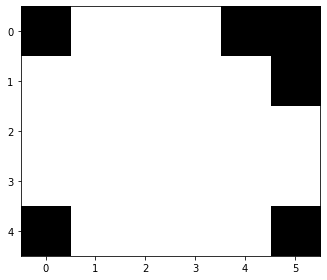

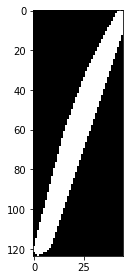

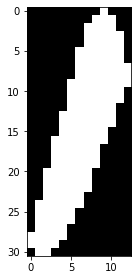

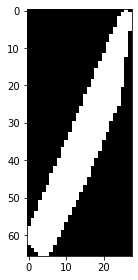

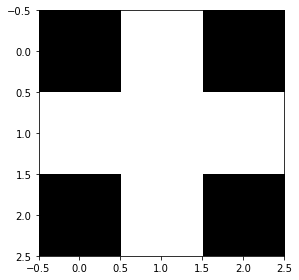

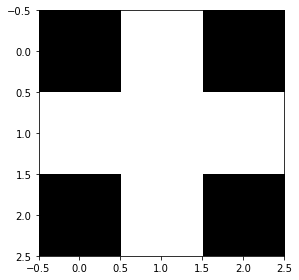

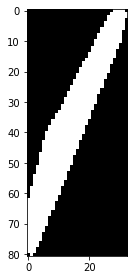

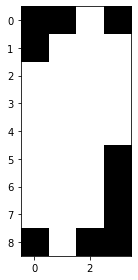

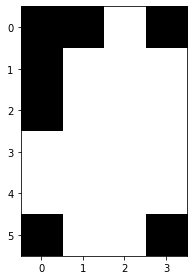

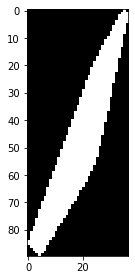

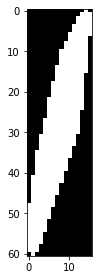

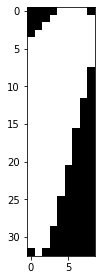

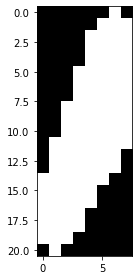

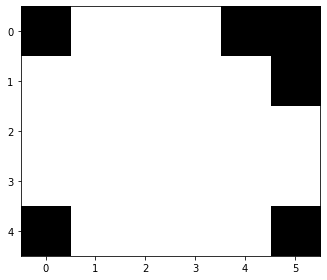

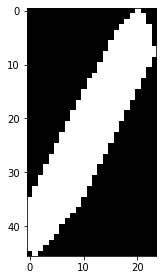

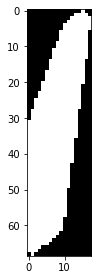

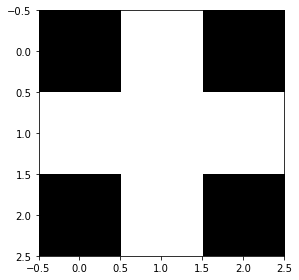

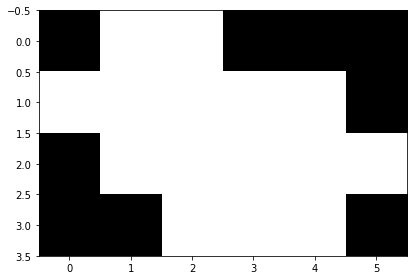

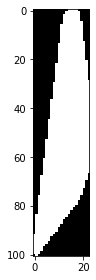

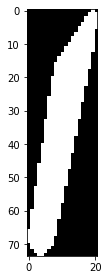

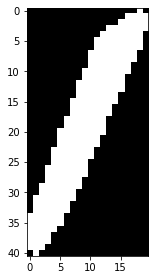

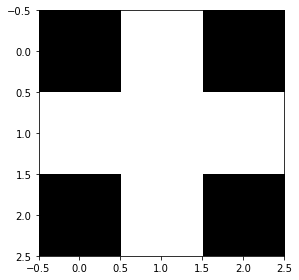

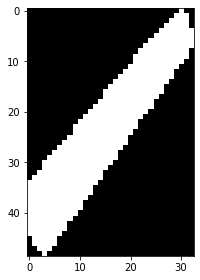

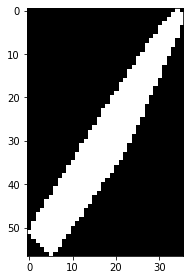

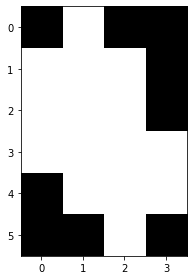

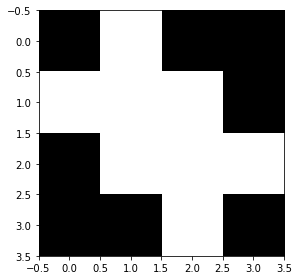

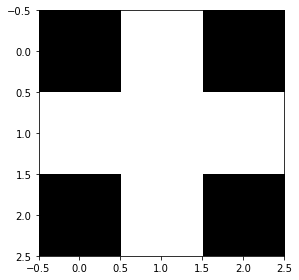

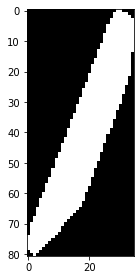

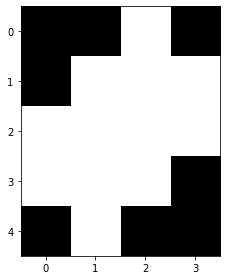

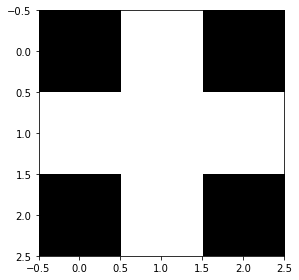

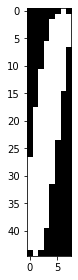

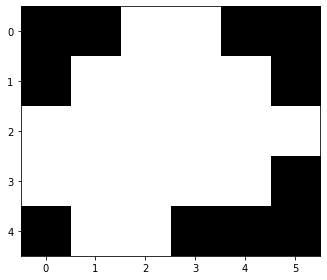

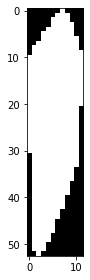

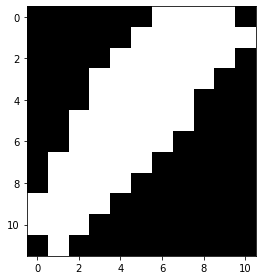

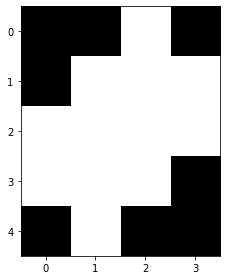

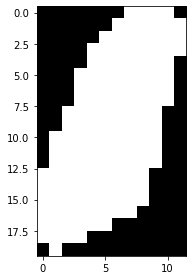

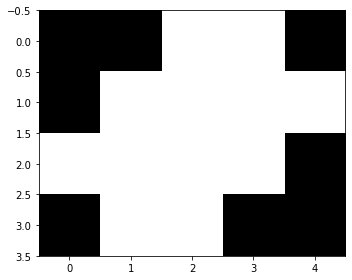

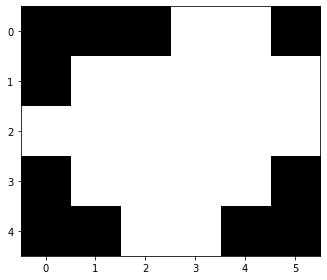

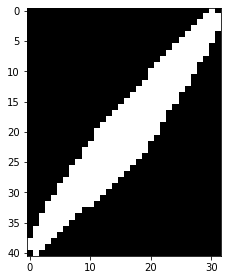

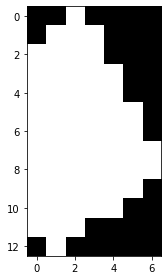

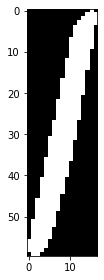

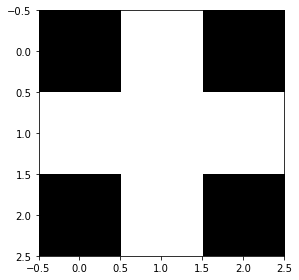

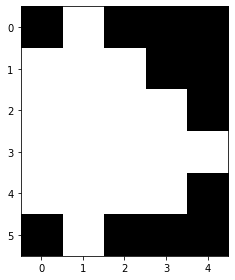

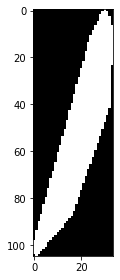

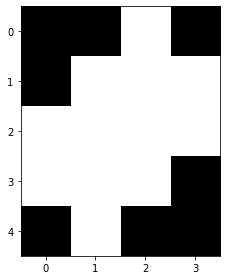

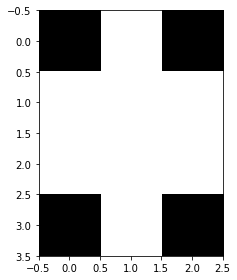

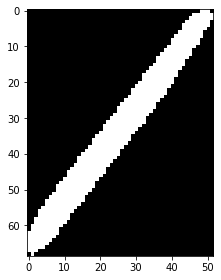

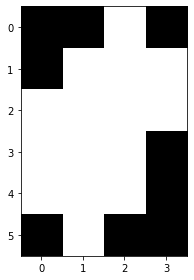

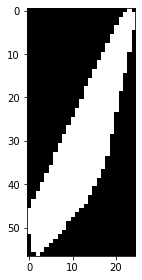

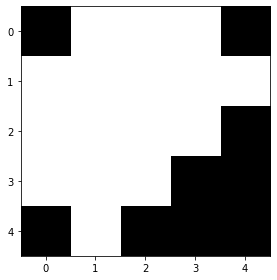

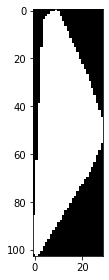

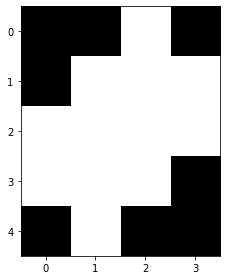

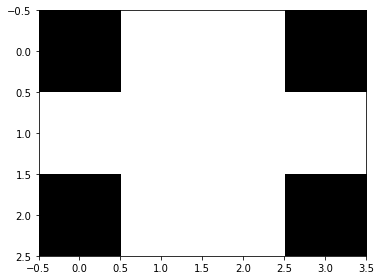

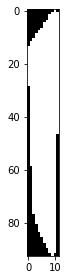

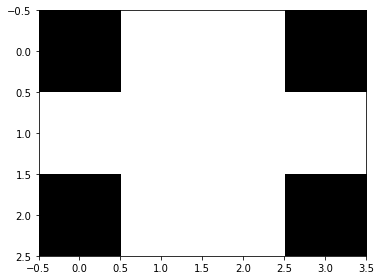

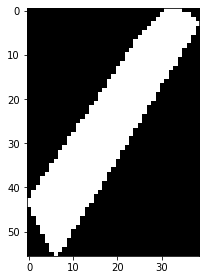

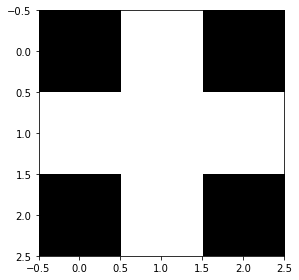

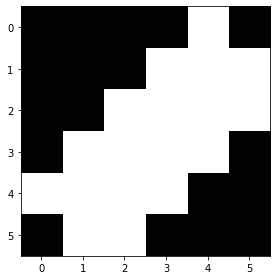

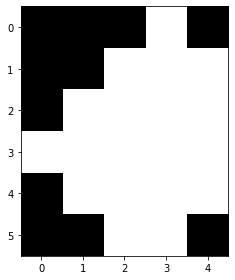

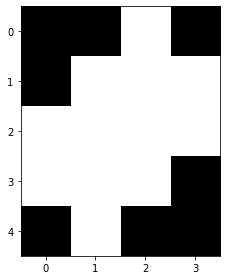

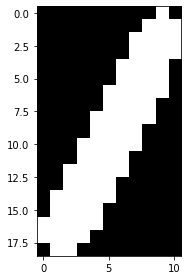

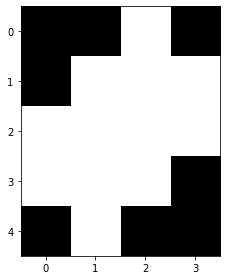

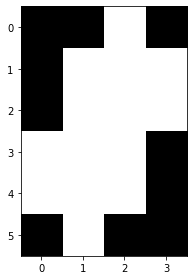

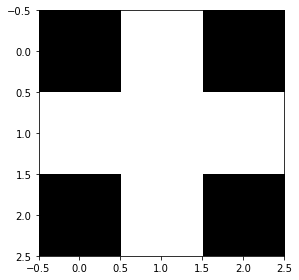

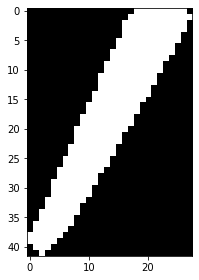

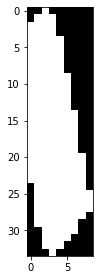

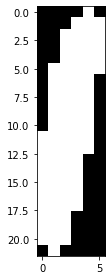

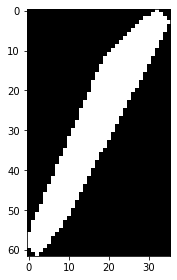

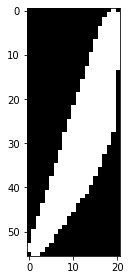

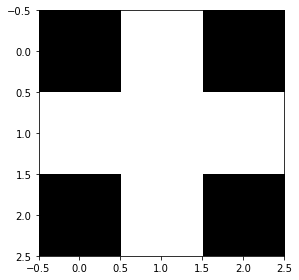

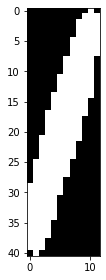

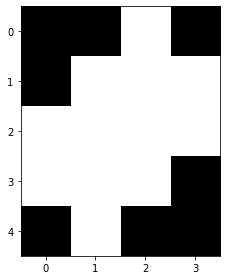

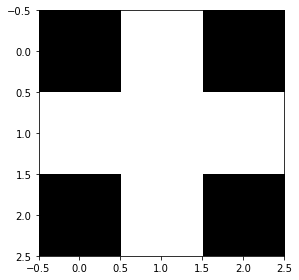

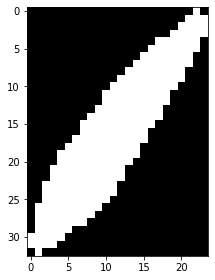

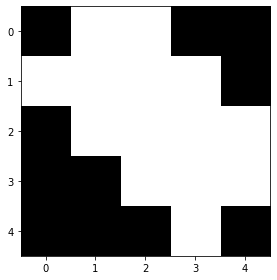

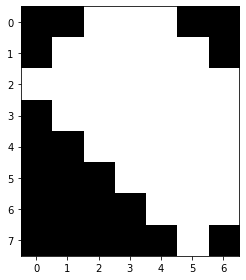

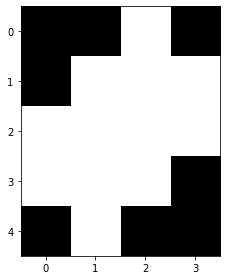

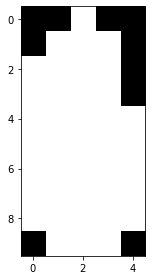

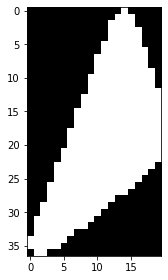

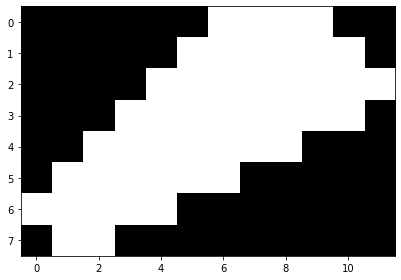

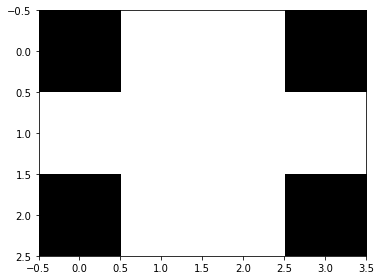

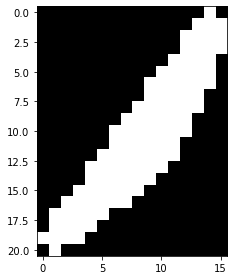

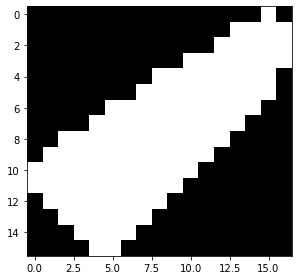

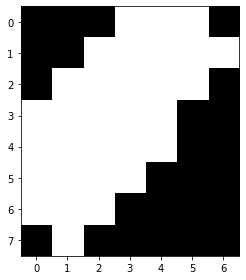

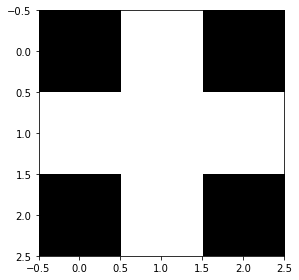

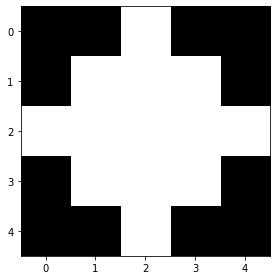

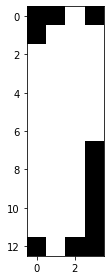

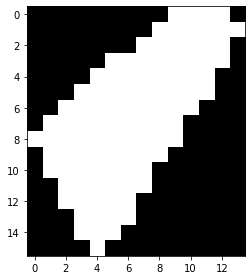

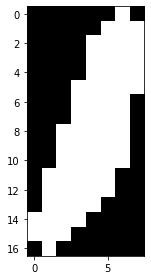

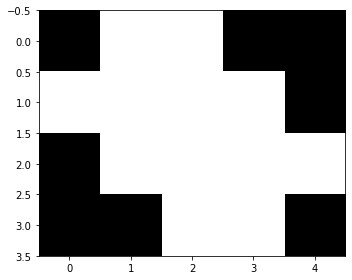

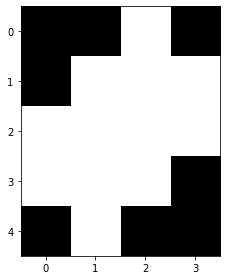

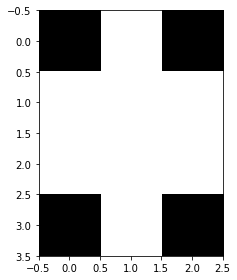

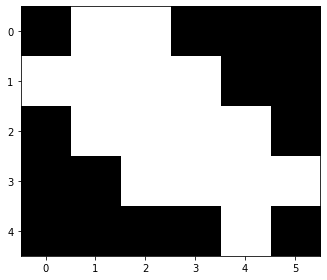

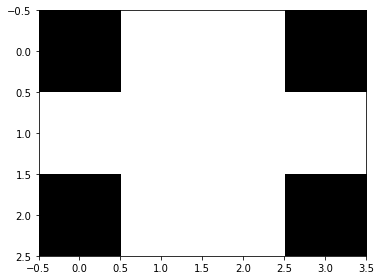

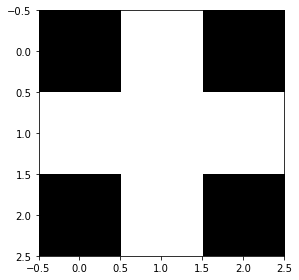

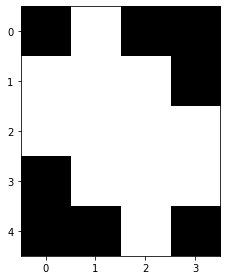

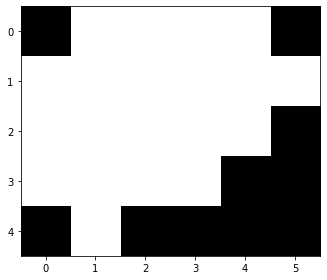

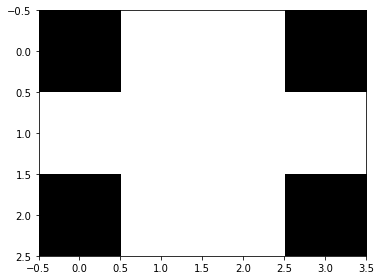

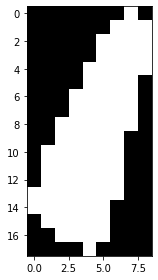

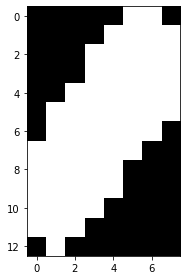

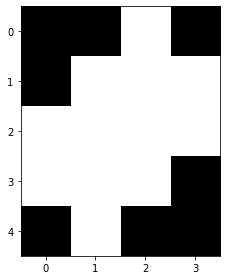

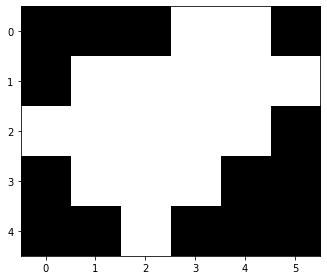

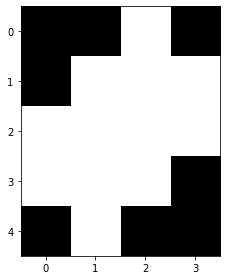

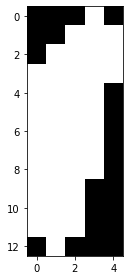

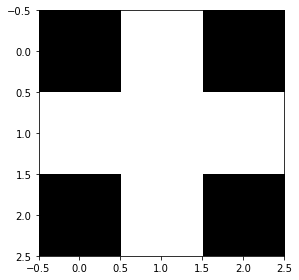

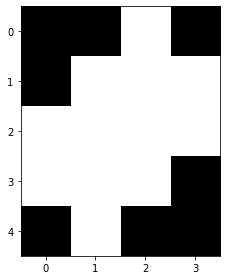

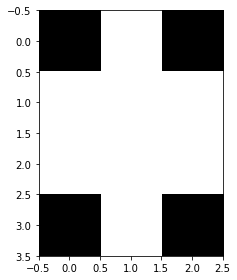

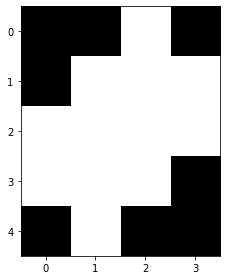

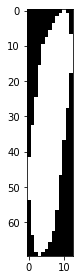

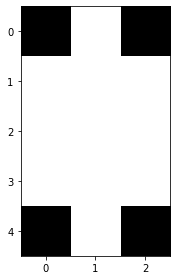

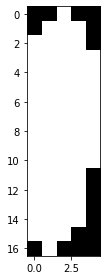

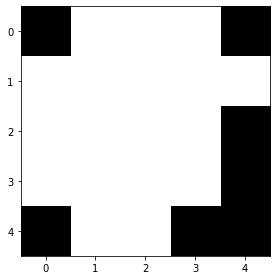

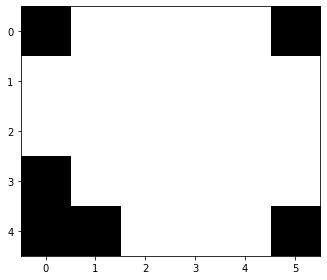

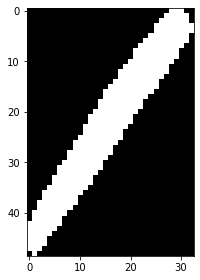

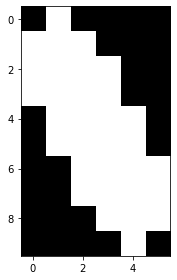

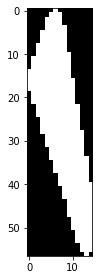

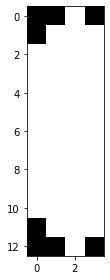

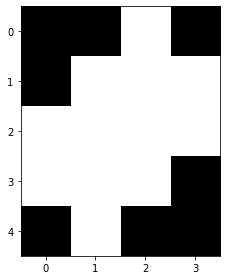

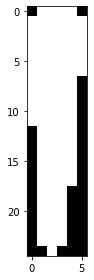

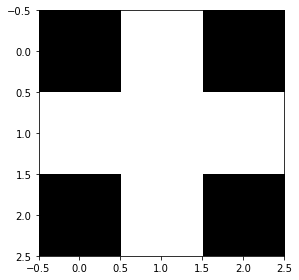

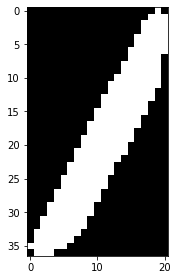

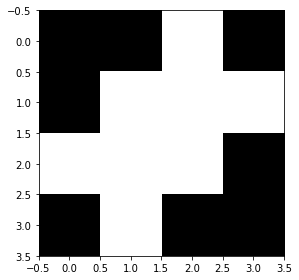

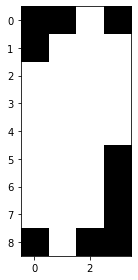

In [65]:
from skimage.morphology import binary_dilation,skeletonize
from skimage.filters import threshold_otsu
from skimage import io
from skimage.color import rgb2gray,label2rgb
from skimage.measure import label, regionprops

img = io.imread("./result.jpg")
img = rgb2gray(img)
thresh = threshold_otsu(img)
binary = img > thresh
skeleton = skeletonize(binary)
skeleton = binary_dilation(skeleton)
io.imshow(skeleton)


# label image regions
label_image = label(skeleton)
image_label_overlay = label2rgb(label_image, image=img)

io.imsave("./test.jpg",image_label_overlay)
io.imshow(image_label_overlay)

prop = regionprops(label_image)
print(len(prop))
for label in prop:
    #print(label.convex_image)
    io.imshow(label.convex_image)
    io.show()


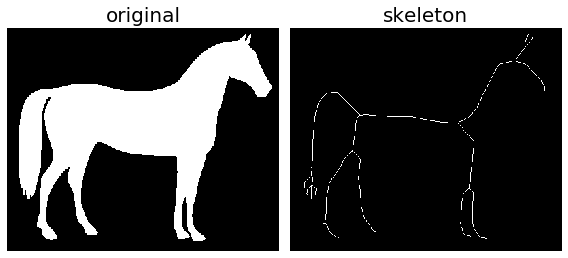

In [10]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

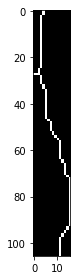

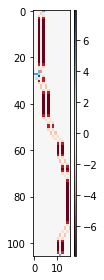

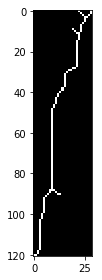

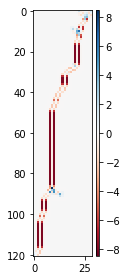

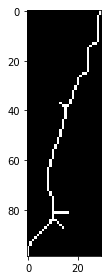

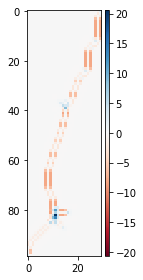

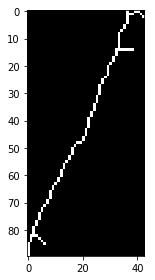

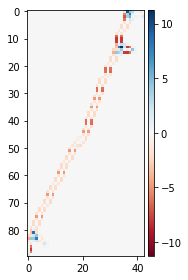

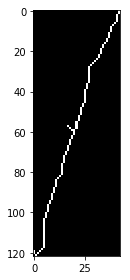

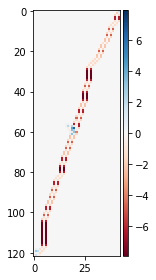

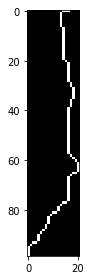

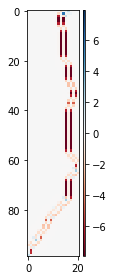

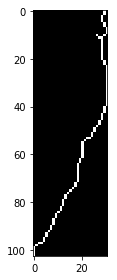

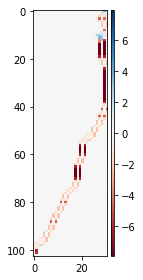

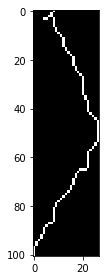

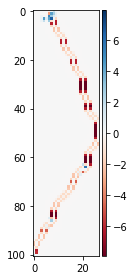

In [18]:
from skimage.morphology import binary_erosion,skeletonize,binary_dilation,binary_closing
from skimage.filters import threshold_otsu
from skimage import io
from skimage.morphology import binary_erosion,skeletonize,binary_dilation,binary_closing
from skimage.filters import threshold_otsu
from skimage import io
from skimage.color import rgb2gray,label2rgb
from skimage.measure import label, regionprops,approximate_polygon
from skimage.draw import line
from scipy import signal
import numpy as np
from skimage.feature import corner_fast, corner_peaks,corner_foerstner,corner_harris
#################################################################
def findJoints(skeleimage):
    tshape1 = np.array([[0,1,0],
                        [1,1,0],
                        [0,1,0]])
    tshape2 = np.array([[1,0,1],
                        [0,1,0],
                        [1,0,0]])
    yshape1 = np.array([[1,0,1],
                        [0,1,0],
                        [0,1,0]])
    yshape2 = np.array([[0,0,1],
                        [1,1,0],
                        [0,1,0]])
    pshape1 = np.array([[0,1,0],
                        [1,1,1],
                        [0,1,0]])
    pshape2 = np.array([[1,0,1],
                        [0,1,0],
                        [1,0,1]])

    joints = [tshape1,tshape1.T,np.fliplr(tshape1),np.flipud(tshape1.T)]
    joints.extend([tshape2,np.fliplr(tshape2),np.flipud(tshape2),np.flipud(np.fliplr(tshape2))])
    joints.extend([yshape1,yshape1.T,np.flipud(yshape1),np.fliplr(yshape1.T)])
    joints.extend([yshape2,yshape2.T,np.flipud(yshape2),np.fliplr(yshape2)])
    joints.extend([pshape1,pshape2])
    
    im = np.zeros(skeleimage.shape)
    for j in joints:
        #print(j)
        im += (signal.convolve2d(skeleimage,j,mode='same')/j.sum()).astype(int)
    return im>0;
################################################################
img = io.imread("./result.jpg")
img = rgb2gray(img)
thresh = threshold_otsu(img)
binary = img > thresh
binary = binary_closing(binary)
skeleton = skeletonize(binary)

#io.imshow(skeleton)


# label image regions
label_image = label(skeleton)
image_label_overlay = label2rgb(label_image, image=img)

#io.imsave("./test.jpg",image_label_overlay)
io.imshow(image_label_overlay)

prop = regionprops(label_image)
#print(len(prop))

mask = np.ones([3,3])
kernel = mask<0

for obj in prop:
    #print(label.convex_image)
    if obj.area > 100:
        b = findJoints(obj.image)
        joints = label(b)
        dots = regionprops(joints)
        img4edit = np.copy(obj.image)

        for d in dots:
            y,x = np.array(d.centroid).astype(int)
            mask = np.copy(img4edit[y-1:y+2,x-1:x+2])

            img4edit[y-1:y+2,x-1:x+2] = kernel
        
            branchLabel = label(img4edit)
            branches = regionprops(branchLabel)
            branchsize= [branch.area for branch in branches]
            branchcoord = [branch.coords for branch in branches]
            minIndex = np.argmin(np.array(branchsize))
            for i,j in branchcoord[minIndex]:
                img4edit[i,j] = 0
            img4edit[y-1:y+2,x-1:x+2]=mask
            #img4edit[y,x]=1
        
        ##### to fit into polyline
        img4edit = skeletonize(binary_dilation(binary_dilation(img4edit)))
        label4coord = label(img4edit)
        coords = regionprops(label4coord)[0]
        polyline = approximate_polygon(coords.coords, tolerance=0.02)
        polylineImage = np.zeros(img4edit.shape)
        xlast=-1
        ylast=-1
        row = []
        col = []
        for i,j in polyline:
            if xlast != -1:
                rr,cc = line(ylast,xlast,i,j)
                row.extend(rr)
                col.extend(cc)
                #polylineImage[rr,cc] = 1
            xlast = j
            ylast = i    
            #polylineImage[i,j] = 1
        polylineImage[row,col] = 1  
            
        
        io.imshow(obj.image)
        io.show()
        corners = corner_harris(obj.image,sigma=0.5)
        io.imshow(corners)
        io.show()


